In [1]:
# importing dependencies
import pandas as pd

In [34]:
# reading in summary csv
summary_df = pd.read_csv('Resources/cluster_summary.csv')
summary_df

,cluster,kwh_ann_tot,customer_count,util,sector,building_type,rate_class,kwh_bin,kw_bin
0,sdge-com-SDG1-com_other-noKW-Care-0.0_0.2,7.756975e+04,72,sdge,com,com_other,Care,0.0_0.2,noKW
1,sdge-com-SDG1-com_other-noKW-Care-0.2_0.4,2.386990e+05,71,sdge,com,com_other,Care,0.2_0.4,noKW
2,sdge-com-SDG1-com_other-noKW-Care-0.4_0.6,4.120847e+05,72,sdge,com,com_other,Care,0.4_0.6,noKW
3,sdge-com-SDG1-com_other-noKW-Care-0.6_0.8,1.420902e+06,71,sdge,com,com_other,Care,0.6_0.8,noKW
4,sdge-com-SDG1-com_other-noKW-Care-0.8_1.0,1.620293e+07,72,sdge,com,com_other,Care,0.8_1.0,noKW
...,...,...,...,...,...,...,...,...,...
196,sdge-res-SDG1-res_misc-noKW-nonCare-0.5_0.6,5.307001e+08,96094,sdge,res,res_misc,nonCare,0.5_0.6,noKW
197,sdge-res-SDG1-res_misc-noKW-nonCare-0.6_0.7,6.197978e+08,95950,sdge,res,res_misc,nonCare,0.6_0.7,noKW
198,sdge-res-SDG1-res_misc-noKW-nonCare-0.7_0.8,7.343816e+08,96002,sdge,res,res_misc,nonCare,0.7_0.8,noKW
199,sdge-res-SDG1-res_misc-noKW-nonCare-0.8_0.9,9.138204e+08,96011,sdge,res,res_misc,nonCare,0.8_0.9,noKW


In [35]:
# calculating total annual kwh
total_annual_kwh = summary_df['kwh_ann_tot'].sum()
total_annual_kwh

19112559886.153946

In [18]:
# calculating building specific energy usage
bldg_kwh = summary_df[['building_type', 'kwh_ann_tot']].groupby('building_type').sum().sort_values('kwh_ann_tot', ascending=False)
bldg_kwh

,kwh_ann_tot
building_type,
res_misc,7.536514e+09
office,4.725154e+09
com_other,3.118775e+09
retail,1.922126e+09
ind_other,7.103688e+08
comp_elec,3.747366e+08
water,2.368621e+08
plas_rub,1.854068e+08
wwater,9.076598e+07


In [112]:
cluster_list = summary_df.loc[summary_df['building_type'].isin(summary_df['building_type'].unique()[1:])]['cluster']

master_df = pd.DataFrame()

for cluster in cluster_list:
    
    csv_item = "Resources/" + cluster + ".csv"
    
    building = cluster.split('-')[3]
    
    ds = pd.read_csv(csv_item)
    ds['building_type'] = building
    
    master_df = master_df.append(ds)
    
master_df

C:\Users\armck\AppData\Local\Continuum\anaconda3\envs\PythonData\lib\site-packages\pandas\core\frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


,building_type,cooling,hour_ending,hvac,lighting,other,plugload,poolpump,process,pumping,total
0,office,NaN,1.0,247.092449,321.289100,544.492116,NaN,NaN,NaN,NaN,1112.873665
1,office,NaN,2.0,237.623650,314.768353,540.846687,NaN,NaN,NaN,NaN,1093.238690
2,office,NaN,3.0,241.887057,306.542408,520.569490,NaN,NaN,NaN,NaN,1068.998955
3,office,NaN,4.0,250.317419,304.855163,508.078182,NaN,NaN,NaN,NaN,1063.250764
4,office,NaN,5.0,266.098569,319.158525,514.574806,NaN,NaN,NaN,NaN,1099.831900
...,...,...,...,...,...,...,...,...,...,...,...
8755,res_misc,0.000000,8756.0,NaN,NaN,196773.523615,84331.510121,2209.743144,NaN,NaN,283314.776880
8756,res_misc,2.318561,8757.0,NaN,NaN,188931.986415,80970.851321,1774.246320,NaN,NaN,271679.402616
8757,res_misc,4.822606,8758.0,NaN,NaN,177142.292067,75918.125171,1274.231448,NaN,NaN,254339.471292
8758,res_misc,6.909311,8759.0,NaN,NaN,165975.117879,71132.193376,887.123160,NaN,NaN,238001.343726


In [113]:
# calc peak hour demand
peak_hr_df = master_df[['hour_ending', 'total']].groupby('hour_ending').sum().sort_values('total', ascending=False)
peak_hr_df

,total
hour_ending,
6185.0,3.577323e+06
6208.0,3.572779e+06
6209.0,3.572120e+06
6186.0,3.536368e+06
6233.0,3.501773e+06
...,...
7348.0,1.195639e+06
2308.0,1.194629e+06
7661.0,1.191971e+06


In [115]:
# calc end use contribution
peak_hr = int(peak_hr_df.index[0])
end_use_contr = master_df.groupby('hour_ending').sum().iloc[peak_hr].sort_values(ascending=False)
end_use_contr

total       3.536368e+06
other       1.839027e+06
plugload    5.848806e+05
lighting    4.678177e+05
hvac        2.971412e+05
process     9.377179e+04
cooling     8.048195e+04
poolpump    4.167594e+04
pumping     2.304538e+04
Name: 6186.0, dtype: float64

In [126]:
peak_building_df = master_df.groupby(['hour_ending', 'building_type']).sum().reset_index()
peak_building = peak_building_df[['hour_ending', 'building_type', 'total']].loc[peak_building_df['hour_ending'] == peak_hr].sort_values('total', ascending=False)
peak_building

,hour_ending,building_type,total
80401,6185.0,res_misc,2.038639e+06
80399,6185.0,office,9.029112e+05
80402,6185.0,retail,3.468466e+05
80397,6185.0,ind_other,1.407064e+05
80393,6185.0,comp_elec,7.028613e+04
80403,6185.0,water,2.440498e+04
80392,6185.0,chemical,1.569327e+04
80404,6185.0,wwater,1.175575e+04
80398,6185.0,metals,9.080728e+03
80394,6185.0,crop,8.211951e+03


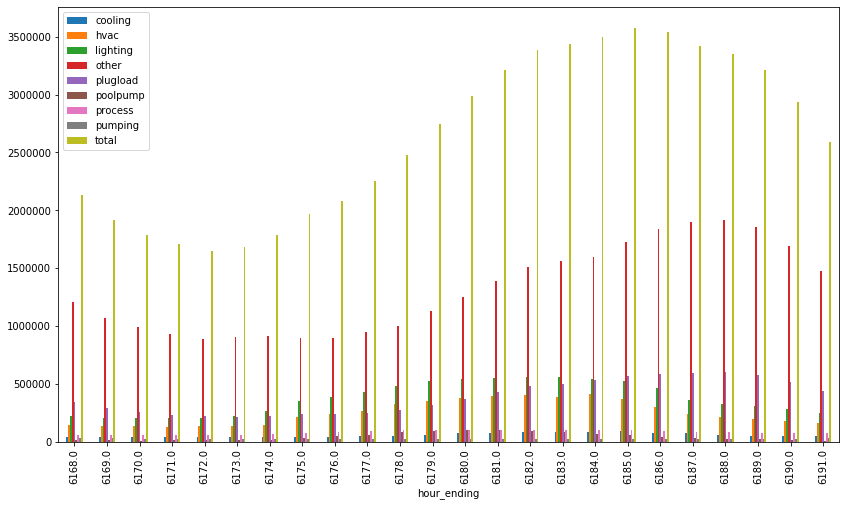

In [160]:
import math

start_hr = math.floor(365 - ((8760 - peak_hr) / 24)) * 24
end_hr = math.ceil(365 - ((8760 - peak_hr) / 24)) * 24


master_df.loc[(master_df['hour_ending'] >= start_hr) & (master_df['hour_ending'] < end_hr)].groupby('hour_ending').sum().plot(
    kind='bar',
    figsize=(14,8)
)

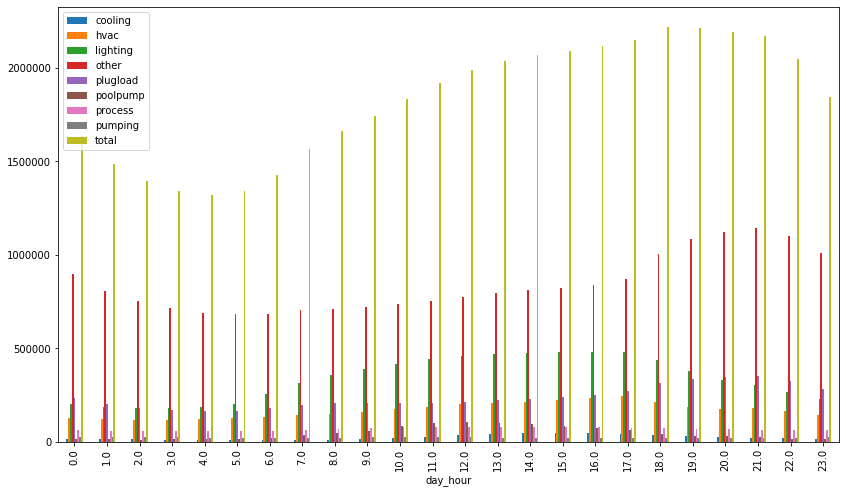

In [182]:
master_df['day_hour'] = master_df['hour_ending'] % 24

avg_hour_df = master_df.groupby('day_hour').sum() / 365

avg_hour_df = avg_hour_df.drop(columns = {'hour_ending'})

avg_hour_df.plot(
    kind='bar',
    figsize=(14,8)
)

In [186]:
# relatively 'same' as sum std? (what a cluster fuck)
master_df.groupby('day_hour').std().sum()

cooling         71029.147831
hour_ending     60691.279504
hvac           249421.555335
lighting       409077.989671
other          373235.073113
plugload       293308.604289
poolpump        28781.122193
process         56078.553603
pumping         23173.455163
total          731877.763493
dtype: float64

In [196]:
building_list = ['office', 'retail']

building_lighting_df = master_df[['building_type', 'lighting', 'total']].loc[master_df['building_type'].isin(building_list)].groupby('building_type').sum()

efficieasdfiofaj = 80/110

building_lighting_df['lighting_led'] = building_lighting_df['lighting'] * efficieasdfiofaj

building_lighting_df['led_savings'] = building_lighting_df['lighting'] - building_lighting_df['lighting_led']

building_lighting_df['total_pct_savings'] = (building_lighting_df['led_savings'] / building_lighting_df['total'].sum()) * 100

building_lighting_df

,lighting,total,lighting_led,led_savings,total_pct_savings
building_type,,,,,
office,1.870954e+09,4.725154e+09,1.360694e+09,5.102602e+08,7.676226
retail,1.083402e+09,1.922126e+09,7.879288e+08,2.954733e+08,4.445025
